# Introduction to geopandas GeoDataFrames

Now as we have learned how to create and represent geographic data in Python using shapely objects, we will continue and use [geopandas](https://geopandas.org/) [^geopandas] as our main tool for spatial data analysis in vector format. 

**Geopandas** is a Python library designed to make working with geospatial data in Python easier. It extends the data types used by pandas (which we covered in Part I) to allow geospatial operations on geometric types. Essentially, it provides a high-level interface for vector data (like points, lines, and polygons) that integrates well with the existing pandas framework, as well as the extensive Python GIS ecosystem (see Figure 5.1 in Chapter 5). Geopandas is one of the core libraries for GIS in Python and it is widely used in different sectors (academia, industry, etc.) for conducting spatial operations and analyses.

## What is a GeoDataFrame?

The main data structures in geopandas are `GeoSeries` and `GeoDataFrame` which extend the capabilities of `Series` and `DataFrames` from pandas. This means that we can use many familiar methods from pandas also when working with geopandas and geograpchic data. A `GeoDataFrame` is basically a `pandas.DataFrame` that contains a dedicated column for storing geometries (see Figure 6.10). The geometry column is a `GeoSeries` which contains the geometries as shapely objects (points, lines, polygons, multipolygons etc.). As we learned in the previous section, shapely provides many useful functionalities to work with geographic data. Luckily for us, these same functionalities can be directly applied to `GeoSeries` which makes it extremely convenient to work with data layers that potentially contain thousands or even millions of geographic features. In this chapter, you will learn various useful techniques and tools bundled in geopandas that help you to work with geographic data in vector format.

![_**Figure 6.10**. Geometry column in a GeoDataFrame._](../img/geodataframe.png)

_**Figure 6.10**. Geometry column in a GeoDataFrame._

## Reading a file

Similarly as with `pandas`, a typical first step when starting to work with `geopandas` is to read data from a given file. In `geopandas`, we can use a generic function `.from_file()` for reading geospatial data from various data formats, such as the ones introduced in Chapter 5. In the data -folder, we have census data from Austin, Texas downloaded from the [U.S Census bureau](https://www.census.gov/programs-surveys/acs/data.html) [^us_census] which we will use to introduce some of the basic data input/output functionalities of `geopandas`. Let's start by defining the path to the file that we want to read into the memory: 

In [1]:
from pathlib import Path

data_folder = Path("data/Austin")
fp = data_folder / "austin_pop_2019.gpkg"
print(fp)

data/Austin/austin_pop_2019.gpkg


Similar to importing `pandas`, we will first import geopandas as `gpd` which allows us to start using the library. Then we will read the file by passing the filepath to `.read_file()` function of `geopandas`:

In [2]:
import geopandas as gpd

data = gpd.read_file(fp)

You can use the `.read_file()` command in this way to read data from many different vector formats (GeoPackage, Shapefile, GeoJSON, etc.). Hence, it is very easy to start working with geographic data using geopandas. Let's take a look at the data type of our `data` variable:

In [3]:
type(data)

geopandas.geodataframe.GeoDataFrame

Here we see that our `data` -variable is a `GeoDataFrame` which extends the functionalities of `DataFrame` to handle spatial data as discussed earlier. We can apply many familiar `pandas` methods to explore the contents of our `GeoDataFrame`. Let's have a closer look at the first rows of the data: 

In [4]:
data.head()

,pop2019,tract,geometry
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3..."
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.330 3..."
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3..."
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3..."
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3..."


We can see that there are three columns in our `GeoDataFrame`. The columns `pop2019` and `tract` represent attribute information in our data, namely the number of people living on a given census tract and a unique id-number for the tract, wherease the column `geometry` contains the geographic data (polygons) for each census tract.

It is always a good idea to explore your geographic data on a map. Creating a simple map from a `GeoDataFrame` is really easy. You can use the `.plot()` function from geopandas that creates a map based on the geometries of the data. `geopandas` actually uses `matplotlib` for plotting which we introduced in Part 1 of this book. Let's try it out, and do a quick visualization of our data.

<Axes: >

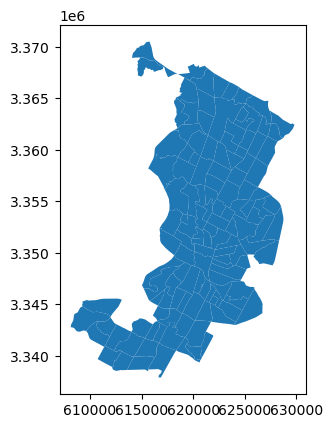

In [5]:
data.plot()

_**Figure 6.11**. Census tract polygons for Austin, Texas, USA._

Voilá! Now you have created your first map with geopandas! This map gives a quick overview of how the geometries of the cencus tracts are located in the given region. The `x` and `y` axes in the plot are based on the coordinate values of the geometries which are in this case represented as meters.

#### Question 6.2

Figure out the following information from our input data using your `pandas` skills:
    
- Number of rows?
- Number of census tracts (based on column `tract`)?
- Total population (based on column `pop2019`)?

In [6]:
# You can use this cell to enter your solution.

In [7]:
# Solution

print("Number of rows", len(data))
print("Number of census tract", data["tract"].nunique())
print("Total population", data["pop2019"].sum())

Number of rows 130
Number of census tract 130
Total population 611935.0


## Geometries in geopandas

As we saw from the previous example, a `GeoDataFrame` has one column for storing geometries. By default, `geopandas` looks for the geometries from a column called `geometry`, which is ultimately a `GeoSeries` data structure containing shapely geometric objects. Let's have a closer look at the geometry column of our data:

In [8]:
data["geometry"].head()

0    POLYGON ((615643.487 3338728.496, 615645.477 3...
1    POLYGON ((618576.586 3359381.053, 618614.330 3...
2    POLYGON ((619200.163 3341784.654, 619270.849 3...
3    POLYGON ((621623.757 3350508.165, 621656.294 3...
4    POLYGON ((621630.247 3345130.744, 621717.926 3...
Name: geometry, dtype: geometry

As we can see here,  the `geometry` column contains polygon geometries. The last line above reveals that the data type (`dtype`) of this column is `geometry`. Hence, in a similar manner as `pandas` can identify automatically that specific column contains e.g. integer values, geopandas has identified that the data type of a column containing `shapely.geometry` objects is `geometry`. As we learned earlier, the `shapely.geometry` objects have various useful attributes and methods that we can use to work with geographic data. Luckily for us, it is possible to use these shapely methods directly in geopandas and apply them to a whole `GeoSeries` without a need to access individual geometries one by one. With this in mind, let's proceed and calculate the area of each census tract polygon. Calculating an area of all geometries in your data can be done easily by using a command `.area` that comes with the `GeoDataFrame` object. As a reminder, the census data are in a metric coordinate reference system, so the area values will be given in square meters:

In [9]:
data["geometry"].area

0      4.029772e+06
1      1.532030e+06
2      3.960344e+06
3      2.181762e+06
4      2.431208e+06
           ...     
125    2.321182e+06
126    4.388407e+06
127    1.702764e+06
128    3.540893e+06
129    2.054702e+06
Length: 130, dtype: float64

The same result can be achieved by using the syntax `data.area`. Let's convert the area values from square meters to square kilometers and store them into a new column called `area_km2`:

In [10]:
data["area_km2"] = data.area / 1000000
data.head()

,pop2019,tract,geometry,area_km2
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3...",4.029772
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.330 3...",1.532030
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3...",3.960344
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3...",2.181762
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3...",2.431208


As we can see, now we added a new column into our `GeoDataFrame` which contains the area of each polygon as square kilometers. Now you have succesfully conducted your first geocomputational analysis in Python! Quite easy isn't it? We can also very easily visualize the data and make a nice choropleth map by using the area of a given geometry to determine the color for it. To do this, we can use the parameter `column` of the `.plot()` method in geopandas to specify that the color for each polygon should be based on the values stored in the `area_km2` column:  

<Axes: >

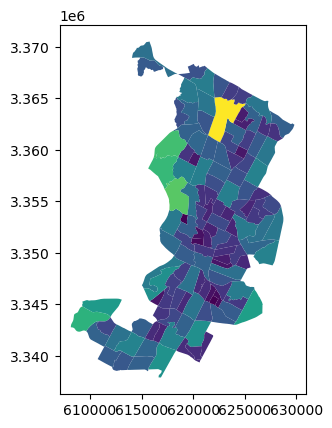

In [11]:
data.plot(column="area_km2")

_**Figure 6.12**. A map showing census tracts colored based on the size of the Polygon._

As a result, we can more easily spot the larger polygons from the map with brighter colors. There are various ways to modify the appearance of the map and colors, which we will learn later in Chapter 8.

#### Question 6.3

Using your `pandas` skills, create a new column `pop_density_km2` and populate it with population density values (population / km2) calculated based on columns `pop2019` and `area_km2`. Print out answers to the following questions:

- What was the average population density in 2019?
- What was the maximum population density per census tract?

In [12]:
# Use this cell to enter your solution.

In [13]:
# Solution

# Calculate population density
data["pop_density_km2"] = data["pop2019"] / data["area_km2"]

# Print out average and maximum values
print("Average:", round(data["pop_density_km2"].mean()), "pop/km2")

print("Maximum:", round(data["pop_density_km2"].max()), "pop/km2")

Average: 2397 pop/km2
Maximum: 11324 pop/km2


## Writing data into a file

Similarly as reading data, writing the contents of your `GeoDataFrame` into a specific file is one of the most typical operations when working with geographic data. It is possible to export the `GeoDataFrame` into various data formats using the `.to_file()` method. Let's start by learning how we can write data into a `GeoPackage`. Before proceeding, let's see how the data looks like at this point:

In [14]:
data.head()

,pop2019,tract,geometry,area_km2,pop_density_km2
0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3...",4.029772,1506.288769
1,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.330 3...",1.532030,1437.961408
2,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3...",3.960344,1873.322183
3,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3...",2.181762,1938.341868
4,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3...",2.431208,1887.538655


Writing the contents of this `GeoDataFrame` into a file can be done by using the `.to_file()` method. To use the method, we only need to pass the filepath to the file into which the data will be written. Geopandas automatically identifies the correct format based on the file extension that have been written after the dot in the file path. For instance in the example below, the text `.gpkg` at the end of the `output_fp` variable determines that the `GeoDataFrame` will be written in GeoPackage format:

In [15]:
# Create a output path for the data
output_fp = "data/Temp/austin_pop_density_2019.gpkg"

# Write the file
data.to_file(output_fp)

Now we have successfully stored the data into a file called `austin_pop_density_2019.gpkg`. Notice, that if you have an existing file with the same name, geopandas will automatically overwrite the contents (without asking). Hence, it is good to be a bit mindful about the naming of the files whenever writing data to disk. 

#### Question 6.4

Read the output file using `geopandas` and check that the data looks ok.

In [16]:
# Use this cell to enter your solution.

In [17]:
# Solution

temp = gpd.read_file(output_fp)

# Check first rows
temp.head()

# You can also plot the data for a visual check by uncommenting the following
# temp.plot()

,pop2019,tract,area_km2,pop_density_km2,geometry
0,6070.0,002422,4.029772,1506.288769,"POLYGON ((615643.487 3338728.496, 615645.477 3..."
1,2203.0,001751,1.532030,1437.961408,"POLYGON ((618576.586 3359381.053, 618614.330 3..."
2,7419.0,002411,3.960344,1873.322183,"POLYGON ((619200.163 3341784.654, 619270.849 3..."
3,4229.0,000401,2.181762,1938.341868,"POLYGON ((621623.757 3350508.165, 621656.294 3..."
4,4589.0,002313,2.431208,1887.538655,"POLYGON ((621630.247 3345130.744, 621717.926 3..."


## Different file formats for reading and writing geographic data 

There are various GIS data formats available such as [Shapefile](https://en.wikipedia.org/wiki/Shapefile) [^shp], [GeoJSON](https://en.wikipedia.org/wiki/GeoJSON) [^GeoJson], [KML](https://en.wikipedia.org/wiki/Keyhole_Markup_Language) [^KML], and [GeoPackage](https://en.wikipedia.org/wiki/GeoPackage) [^GPKG]. Geopandas is capable of reading data from all of these formats (plus many more). In the following, we will show some typical examples how to read (and write) data from different sources. The main point in this section is to demonstrate the basic syntax for reading and writing data using short code snippets. You can find the example datasets in the data-folder. However, most of the example databases do not exists, but you can use and modify the example syntax according to your own setup.

### Reading vector data

When we use the `.from_file()` function for reading data in various formats, geopandas actually uses a library called **fiona** under the hood to read the data (in most cases). This means that you can read and write all data formats that are supported by fiona. It is easy to find out all the data formats that are supported by default by calling `fiona.supported_drivers`: 

In [18]:
import geopandas as gpd
import fiona

fiona.supported_drivers

{'DXF': 'rw',
 'CSV': 'raw',
 'OpenFileGDB': 'raw',
 'ESRIJSON': 'r',
 'ESRI Shapefile': 'raw',
 'FlatGeobuf': 'raw',
 'GeoJSON': 'raw',
 'GeoJSONSeq': 'raw',
 'GPKG': 'raw',
 'GML': 'rw',
 'OGR_GMT': 'rw',
 'GPX': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'DGN': 'raw',
 'PCIDSK': 'raw',
 'OGR_PDS': 'r',
 'S57': 'r',
 'SQLite': 'raw',
 'TopoJSON': 'r'}

As we can see, by default there are 20 different file formats that are supported for reading data. In the list of supported drivers, `r` is for file formats that fiona/geopandas can be read, and `w` is for file formats it can write. Letter `a` marks formats for which fiona/geopandas can append new data to existing files. Let's read the same Austin census data in a Shapefile format to see the basic syntax:

In [19]:
# Read Esri Shapefile
fp = data_folder / "austin_pop_2019.shp"
data = gpd.read_file(fp)
data.head()

,fid,pop2019,tract,geometry
0,1.0,6070.0,002422,"POLYGON ((615643.487 3338728.496, 615645.477 3..."
1,2.0,2203.0,001751,"POLYGON ((618576.586 3359381.053, 618614.330 3..."
2,3.0,7419.0,002411,"POLYGON ((619200.163 3341784.654, 619270.849 3..."
3,4.0,4229.0,000401,"POLYGON ((621623.757 3350508.165, 621656.294 3..."
4,5.0,4589.0,002313,"POLYGON ((621630.247 3345130.744, 621717.926 3..."


As you can see, nothing except the file extension at the end of the filename changed, from `.gpkg` into `.shp`. The same syntax works for other common vector data formats, such as GeoJSON or MapInfo TAB format:

In [20]:
# Read file from Geopackage
fp = "data/Austin/austin_pop_2019.gpkg"
data = gpd.read_file(fp)

# Read file from GeoJSON
fp = "data/Austin/austin_pop_2019.geojson"
data = gpd.read_file(fp)

# Read file from Geodatabase
fp = "data/Austin/austin_pop_2019.gdb"
data = gpd.read_file(fp)

# Read file from MapInfo TAB
fp = "data/Austin/austin_pop_2019.tab"
data = gpd.read_file(fp)

Some file formats such as GeoPackage may contain multiple layers with different names which can be speficied using the `layer` -parameter. Our example geopackage file has only one layer with the same name as the file, so we don't actually need to specify it to read in the data, but we can of course:

In [21]:
# Read spesific layer from Geopackage
fp = "data/Austin/austin_pop_2019.gpkg"
data = gpd.read_file(fp, layer="austin_pop_2019")

In some cases, such as when reading KML file format, geopandas does not automatically support reading the data:

In [ ]:
# Read file from KML
fp = "data/Austin/austin_pop_2019.kml"
data = gpd.read_file(fp)

![Unsupported driver error.](../img/unsupported_driver_error.png)

In case you receive an error that says something like `DriverError: unsupported driver: XXXXX`, it means that the given data format is not ready for reading by default. Luckily, most often you are still able to read the data after telling geopandas that it is okay to read the data from a given data format. As an example, here we tell the geopandas to support KML file format by adding `LIBKML` to supported drivers, and specify that it is possible to data read and write data with this file format (by adding `"rw"`):

In [22]:
# Enable KML driver
gpd.io.file.fiona.drvsupport.supported_drivers["LIBKML"] = "rw"

# Read file from KML
fp = "data/Austin/austin_pop_2019.kml"
data = gpd.read_file(fp)

type(data)

geopandas.geodataframe.GeoDataFrame

Note that the KML file format isn't a format that is fully supported in geopandas, so there may be additional data columns read into the `data` GeoDataFrame. Thus, we will extract only the columns of interest before proceeding.

In [23]:
data = data[["pop2019", "tract", "geometry"]]

After this small adjustment, geopandas is able to read the KML file into a `GeoDataFrame` without a problem. In a similar manner, you can also enable some other file formats that are not enabled by default for reading and/or writing.

Lastly, we demonstrate how it is possible to read data directly from a ZIP file format which can be quite useful especially if you are working with large datasets or a collection of multiple files stored into a single ZIP archive. ZIP file is an archive data format where the data is compressed efficiently. For instance, after zipping Shapefiles, the disk space needed to store the data in the given format will be significantly lower. To read the data from ZIP files, we can use the built-in Python library called **zipfile** and its `ZipFile` object which makes it possible to work with compressed ZIP files. The following example shows how to read data from a compressed ZIP file. Let's start by opening the file into a variable `z` and then read the names of the files stored inside the archive with the method `.namelist()`:

In [24]:
from zipfile import ZipFile

fp = "data/Helsinki/building_points_helsinki.zip"

with ZipFile(fp) as z:
    print(z.namelist())

['building_points_helsinki.gpkg']


As you can see, the given `ZipFile` which is opened in variable `z` contains only a single GeoPackage called `building_points_helsinki.gpkg`. The `with ZipFile(fp) as z:` command here is a standard Python convention to open files in read-format from ZIP files. To read the contents of the GeoPackage stored inside the file, we first need use the `.read()` function of the opened `ZipFile` object to read the contents of the file into bytes. After this step, we need to pass these bytes into a `BytesIO` in-memory file buffer by using the built-in `io` library. A file buffer is an in-memory file-like object that can be used as a temporary storage or buffer for bytes-like data. Instead of writing data directly to a physical file on a disk, it allows you to write the data into a `BytesIO` object, which stores the data in computer's memory. This file buffer can then be used by geopandas to read the actual contents of the file into a `GeoDataFrame`. This might sound a bit complicated, but it actually requires only a few lines of code:

In [25]:
import io

with ZipFile(fp) as z:
    # Pick the first text in the name-list
    name_of_the_file = z.namelist()[0]

    # Read the data into filebuffer
    file_buffer = io.BytesIO(z.read(name_of_the_file))

    # Read the filebuffer into Geopandas
    buildings = gpd.read_file(file_buffer)

In [26]:
buildings.head()

,name,geometry
0,None,POINT (24.85584 60.20727)
1,Uimastadion,POINT (24.93045 60.18882)
2,None,POINT (24.95113 60.16994)
3,Hartwall Arena,POINT (24.92918 60.20570)
4,Talli,POINT (24.92607 60.21346)


Ta-da! Now we have succesfully read the GeoPackage from the given ZIP file into a variable `buildings`. In many cases you might have multiple files stored inside a ZIP archive. Following and modifying the examples above (namely the `name_of_the_file` and `fp` variables), you can easily explore the files that are stored inside a given ZIP file and read any geographic data stored in the file into geopandas.

### Writing vector data

We can save spatial data to various vector data formats using the `.to_file()` method of the `GeoDataFrame`. Similarly as when reading data, this functionality also relies on the fiona library under the hood. When writing a `GeoDataFrame` into a file, you basically only need to pass a filename/path to the `.to_file()` method, which will then write the data into the given file. It is possible to specify the output file format using the `driver` parameter. However, for most file formats it is not needed as the tool is able to infer the driver from the file extension (similarly as when reading data):

In [27]:
# Write to Shapefile
outfp = "data/Temp/austin_pop_2019.shp"
data.to_file(outfp)

# Write to MapInfo Tab
outfp = "data/Temp/austin_pop_2019.tab"
data.to_file(outfp)

# Write to Geopackage
outfp = "data/Temp/austin_pop_2019.gpkg"
data.to_file(outfp, driver="GPKG")

# Write to GeoJSON
outfp = "data/Temp/austin_pop_2019.geojson"
data.to_file(outfp, driver="GeoJSON")

# Write to KML
outfp = "data/Temp/austin_pop_2019.kml"
data.to_file(outfp, driver="LIBKML")

# Write to File Geodatabase
outfp = "data/Temp/austin_pop_2019.gdb"
data.to_file(outfp, driver="OpenFileGDB")

In [28]:
print(data.head())

   pop2019   tract                                           geometry
0   6070.0  002422  MULTIPOLYGON (((-97.79891 30.17448, -97.79888 ...
1   2203.0  001751  MULTIPOLYGON (((-97.76612 30.36053, -97.76572 ...
2   7419.0  002411  MULTIPOLYGON (((-97.76163 30.20171, -97.76089 ...
3   4229.0  000401  MULTIPOLYGON (((-97.73545 30.28017, -97.73511 ...
4   4589.0  002313  MULTIPOLYGON (((-97.73600 30.23166, -97.73510 ...


## Creating a GeoDataFrame from scratch

It is possible to create spatial data from scratch by using shapely's geometric objects and geopandas. This is useful as it makes it easy to convert, for example, a text file that contains coordinates into geospatial data layers. Let's first create a simple `GeoDataFrame` based on coordinate information that represents the outlines of the Senate square in Helsinki, Finland. The coordinates below demonstrates the corners of the Senate square, which we can use to create a `Polygon` object in a similar manner as we learned earlier in this chapter:

In [29]:
from shapely.geometry import Polygon

coordinates = [
    (24.950899, 60.169158),
    (24.953492, 60.169158),
    (24.953510, 60.170104),
    (24.950958, 60.169990),
]

poly = Polygon(coordinates)

Now we can use this polygon and create a `GeoDataFrame` from scratch with geopandas. The data can be passed in as a list-like object. In our case, we will only have one row and one column of data. We can pass the polygon inside a list, and name the column as `geometry` so that geopandas will know to use the contents of that column as the source for geometries. Additionally, we could define the coordinate reference system for the data which we will learn in the next chapter.

In [30]:
newdata = gpd.GeoDataFrame(data=[poly], columns=["geometry"])
newdata

,geometry
0,"POLYGON ((24.95090 60.16916, 24.95349 60.16916..."


In this way, we can easily create a `GeoDataFrame` without any attribute data. However, quite often you also want to attach attribute information along with your geometry. We can create a `GeoDataFrame` from scratch with multiple attributes by passing a Python `dictionary` into the `GeoDataFrame` object as follows: 

In [31]:
gdf_data = {
    "geometry": [poly],
    "name": "Senate Square",
    "city": "Helsinki",
    "year": 2023,
}
new_data_extended = gpd.GeoDataFrame(gdf_data)
print(new_data_extended)

                                            geometry           name      city  \
0  POLYGON ((24.95090 60.16916, 24.95349 60.16916...  Senate Square  Helsinki   

   year  
0  2023  


There it is! Now we have four columns in our data, one representing the geometry and other columns with additional attribute information. 

## Creating a GeoDataFrame from a text file

One rather typical situation that you might encounter when working with your course mates or colleagues, is that you receive data that has coordinates but they are stored e.g. in a delimited textfile (or an Excel file). In this case, you cannot directly read the data into `GeoDataFrame` from the text file, but it needs to be converted into geospatial data using the coordinate information. In such a case, we can make use of the pandas, geopandas and shapely libraries for turning the data from a text file into a fully functional `GeoDataFrame`. To demonstrate this, we have some example data below that contains point coordinates of airports derived from [openflights.org](https://openflights.org/data.html) [^openflights]. The operation of turning this data into a `GeoDataFrame` begins with reading the data with pandas into a `DataFrame`. Let's read a couple of useful columns from the data for further processing:

In [32]:
import pandas as pd

airports = pd.read_csv(
    "data/Airports/airports.txt",
    usecols=["Airport ID", "Name", "City", "Country", "Latitude", "Longitude"],
)
airports.head()

,Airport ID,Name,City,Country,Latitude,Longitude
0,1,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998
1,2,Madang Airport,Madang,Papua New Guinea,-5.207080,145.789001
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,-5.826790,144.296005
3,4,Nadzab Airport,Nadzab,Papua New Guinea,-6.569803,146.725977
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,-9.443380,147.220001


In [33]:
type(airports)

pandas.core.frame.DataFrame

In [34]:
len(airports)

7698

As we can see, now the data was read from a textfile into a regular pandas `DataFrame`. In a similar manner, you can read data with coordinates from numerous file formats supported by pandas. Our data covers over 7000 airports with specific attribute information including the coordinates in the `Latitude` and `Longitude` columns. We can use this coordinate information for turning this data into a `GeoDataFrame` and ultimately visualizing the data on a map. There is a handy function in geopandas called `.points_from_xy()` for generating an array of `Point` objects based on `x` and `y` coordinates. This function assumes that x-coordinates represent longitude and the y-coordinates represent latitude. The following code snippet shows how we can create geometries for the airports based on these coordinates:

In [35]:
airports["geometry"] = gpd.points_from_xy(
    x=airports["Longitude"], y=airports["Latitude"]
)

airports = gpd.GeoDataFrame(airports)
airports.head()

,Airport ID,Name,City,Country,Latitude,Longitude,geometry
0,1,Goroka Airport,Goroka,Papua New Guinea,-6.081690,145.391998,POINT (145.39200 -6.08169)
1,2,Madang Airport,Madang,Papua New Guinea,-5.207080,145.789001,POINT (145.78900 -5.20708)
2,3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,-5.826790,144.296005,POINT (144.29601 -5.82679)
3,4,Nadzab Airport,Nadzab,Papua New Guinea,-6.569803,146.725977,POINT (146.72598 -6.56980)
4,5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,-9.443380,147.220001,POINT (147.22000 -9.44338)


In [36]:
type(airports)

geopandas.geodataframe.GeoDataFrame

The `GeoDataFrame` was created with a couple of steps. First, we created a new column called `geometry` into the `DataFrame` and used the `.points_from_xy()` function to turn the coordinates into shapely `Point` objects. At this stage, the data is still in a `DataFrame` format, but we can easily convert the data into a `GeoDataFrame`. The second command in the code snippet converts the pandas `DataFrame` into a `GeoDataFrame` which then has all the capabilities and tools bundled with geopandas. After these two steps, we have succesfully turned the data into geospatial format and we can for example plot the data on a map:

<Axes: >

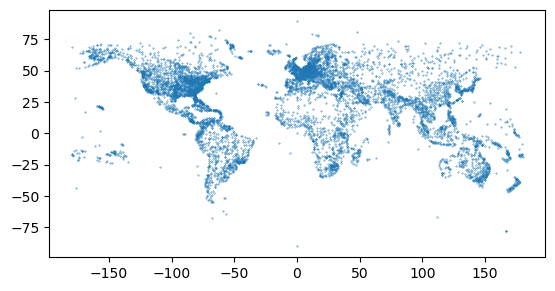

In [37]:
airports.plot(markersize=0.1)

_**Figure 6.13**. A basic plot showing the airports from openflights.org._

## Footnotes

[^GeoJson]: <https://en.wikipedia.org/wiki/GeoJSON>
[^geopandas]: <https://geopandas.org/>
[^GPKG]: <https://en.wikipedia.org/wiki/GeoPackage>
[^KML]: <https://en.wikipedia.org/wiki/Keyhole_Markup_Language>
[^NLS_topodata]: <https://www.maanmittauslaitos.fi/en/maps-and-spatial-data/expert-users/product-descriptions/topographic-database>
[^NLS_lisence]: <https://www.maanmittauslaitos.fi/en/opendata-licence-cc40>
[^OGC_sfa]: <https://www.ogc.org/standards/sfa>
[^openflights]: <https://openflights.org/data.html>
[^paituli]: <https://avaa.tdata.fi/web/paituli/latauspalvelu>
[^shp]: <https://en.wikipedia.org/wiki/Shapefile> 
[^topodata_fair]: <https://etsin.fairdata.fi/dataset/5023ecc7-914a-4494-9e32-d0a39d3b56ae>
[^us_census]: <https://www.census.gov/programs-surveys/acs/data.html>